In [1]:
import pandas as pd

In [2]:
leases = pd.read_csv('../Datasets/Leases.csv')
pd.set_option('display.max_columns', None)
print(leases.columns.tolist())
leases.head()


['year', 'quarter', 'monthsigned', 'market', 'building_name', 'building_id', 'address', 'region', 'city', 'state', 'zip', 'internal_submarket', 'internal_class', 'leasedSF', 'company_name', 'internal_industry', 'transaction_type', 'internal_market_cluster', 'costarID', 'space_type', 'CBD_suburban', 'RBA', 'available_space', 'availability_proportion', 'internal_class_rent', 'overall_rent', 'direct_available_space', 'direct_availability_proportion', 'direct_internal_class_rent', 'direct_overall_rent', 'sublet_available_space', 'sublet_availability_proportion', 'sublet_internal_class_rent', 'sublet_overall_rent', 'leasing']


,year,quarter,monthsigned,market,building_name,building_id,address,region,city,state,zip,internal_submarket,internal_class,leasedSF,company_name,internal_industry,transaction_type,internal_market_cluster,costarID,space_type,CBD_suburban,RBA,available_space,availability_proportion,internal_class_rent,overall_rent,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing
0,2018,Q1,1.0,Atlanta,10 Glenlake North Tower,Atlanta_Central Perimeter_Atlanta_10 Glenlake ...,10 Glenlake Pky NE,South,Atlanta,GA,30328.0,Central Perimeter,A,24736.0,Capital Investment Advisors,Financial Services and Insurance,Expansion,NaN,445509,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
1,2018,Q1,1.0,Atlanta,100 City View,Atlanta_Northwest_Atlanta_100 City View_3330 C...,3330 Cumberland Blvd,South,Atlanta,GA,30339.0,Northwest,A,965.0,NaN,NaN,New,NaN,436994,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
2,2018,Q1,1.0,Atlanta,1000 Parkwood,Atlanta_Northwest_Atlanta_1000 Parkwood_1000 P...,1000 Parkwood Cir SE,South,Atlanta,GA,30339.0,Northwest,A,2215.0,Efc Moen,NaN,New,NaN,434890,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
3,2018,Q1,1.0,Atlanta,1100 Circle 75,Atlanta_Northwest_Atlanta_1100 Circle 75_1100 ...,1100 Circle 75 Pky SE,South,Atlanta,GA,30339.0,Northwest,O,1925.0,NaN,NaN,New,NaN,434720,Relet,Suburban,65810449.0,12728989.0,0.193419,18.560886,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715742.0
4,2018,Q1,1.0,Atlanta,1200 Ashwood,Atlanta_Central Perimeter_Atlanta_1200 Ashwood...,1200 Ashwood Pky,South,Atlanta,GA,30338.0,Central Perimeter,A,2404.0,NaN,NaN,New,NaN,437562,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0


In [3]:
#only focus on leases over 10000 rentable building area
focused_lease = leases[leases['RBA'] > 10000]
focused_lease

,year,quarter,monthsigned,market,building_name,building_id,address,region,city,state,zip,internal_submarket,internal_class,leasedSF,company_name,internal_industry,transaction_type,internal_market_cluster,costarID,space_type,CBD_suburban,RBA,available_space,availability_proportion,internal_class_rent,overall_rent,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing
0,2018,Q1,1.0,Atlanta,10 Glenlake North Tower,Atlanta_Central Perimeter_Atlanta_10 Glenlake ...,10 Glenlake Pky NE,South,Atlanta,GA,30328.0,Central Perimeter,A,24736.0,Capital Investment Advisors,Financial Services and Insurance,Expansion,NaN,445509,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
1,2018,Q1,1.0,Atlanta,100 City View,Atlanta_Northwest_Atlanta_100 City View_3330 C...,3330 Cumberland Blvd,South,Atlanta,GA,30339.0,Northwest,A,965.0,NaN,NaN,New,NaN,436994,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
2,2018,Q1,1.0,Atlanta,1000 Parkwood,Atlanta_Northwest_Atlanta_1000 Parkwood_1000 P...,1000 Parkwood Cir SE,South,Atlanta,GA,30339.0,Northwest,A,2215.0,Efc Moen,NaN,New,NaN,434890,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
3,2018,Q1,1.0,Atlanta,1100 Circle 75,Atlanta_Northwest_Atlanta_1100 Circle 75_1100 ...,1100 Circle 75 Pky SE,South,Atlanta,GA,30339.0,Northwest,O,1925.0,NaN,NaN,New,NaN,434720,Relet,Suburban,65810449.0,12728989.0,0.193419,18.560886,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715742.0
4,2018,Q1,1.0,Atlanta,1200 Ashwood,Atlanta_Central Perimeter_Atlanta_1200 Ashwood...,1200 Ashwood Pky,South,Atlanta,GA,30338.0,Central Perimeter,A,2404.0,NaN,NaN,New,NaN,437562,Relet,Suburban,101140416.0,20239067.0,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194680,2024,Q4,12.0,Tampa,Building II,Tampa_Westshore_Tampa_Building II_3111 W Dr Ma...,3111 W Dr Martin Luther King Blvd,South,Tampa,FL,33607.0,Westshore,A,19654.0,WGI,"Construction, Engineering and Architecture",Renewal and Expansion,Hillsborough,389404,NaN,Suburban,25106444.0,5772868.0,0.230000,32.980000,29.460000,4227315.0,0.0779,33.566518,29.801662,1545553.0,0.0285,26.162086,24.797899,770384.0
194681,2024,Q4,12.0,Tampa,Midtown East,Tampa_Westshore_Tampa_Midtown East_1 Midtown Pl,1 Midtown Pl,South,Tampa,FL,33607.0,Westshore,A,16224.0,Energy Insurance Mutual,NaN,Relocation,Hillsborough,612255,NaN,Suburban,25106444.0,5772868.0,0.230000,32.980000,29.460000,4227315.0,0.0779,33.566518,29.801662,1545553.0,0.0285,26.162086,24.797899,770384.0
194682,2024,Q4,12.0,Tampa,Park Tower,Tampa_Tampa CBD_Tampa_Park Tower_400 N Tampa St,400 N Tampa St,South,Tampa,FL,33602.0,Tampa CBD,O,8475.0,The Florida Bar,Legal Services,New,Hillsborough,380519,Relet,CBD,29139850.0,4891754.0,0.168000,25.600000,29.460000,3967413.0,0.0731,25.777557,29.801662,924341.0,0.0170,22.768426,24.797899,328947.0
194683,2024,Q4,12.0,Tampa,Rivergate Tower,Tampa_Tampa CBD_Tampa_Rivergate Tower_400 N As...,400 N Ashley Dr,South,Tampa,FL,33602.0,Tampa CBD,A,2014.0,Four River Law Firm,Legal Services,Renewal,Hillsborough,380475,NaN,CBD,25106444.0,5772868.0,0.230000,32.980000,29.460000,4227315.0,0.0779,33.566518,29.801662,1545553.0,0.0285,26.162086,24.797899,770384.0


In [4]:
null_counts = leases.isnull().sum()

# Print the result
print(null_counts)

year                                   0
quarter                                0
monthsigned                          863
market                                 0
building_name                      36686
building_id                            0
address                                0
region                                 0
city                                   0
state                                  0
zip                                    1
internal_submarket                     0
internal_class                         9
leasedSF                               0
company_name                      157469
internal_industry                 168284
transaction_type                     539
internal_market_cluster           118847
costarID                               0
space_type                          7545
CBD_suburban                           0
RBA                                49144
available_space                    49144
availability_proportion            49144
internal_class_r

In [5]:


len(leases['company_name'].unique())

28577

In [6]:
leases['internal_industry'].dropna().unique().tolist()

['Financial Services and Insurance',
 'Construction, Engineering and Architecture',
 'Technology, Advertising, Media, and Information',
 'Manufacturing (except Pharmaceutical, Retail, and Computer Tech)',
 'Associations and Non-profit Organizations (except Education and Non-profit Hospitals)',
 'Transportation',
 'Coworking and Executive Suite Companies',
 'Business, Professional, and Consulting Services (except Financial and Legal) - Including Accounting',
 'Education',
 'Legal Services',
 'Real Estate (except coworking providers)',
 'Healthcare',
 'Personal Services and Recreation',
 'Government',
 'Retail',
 'Energy & Utilities',
 'TBD',
 'Pharmaceuticals',
 'Agriculture, Forestry, Fishing, Metal & Mineral Mining',
 'Unclassifiable']

In [7]:
# from geopy.geocoders import Nominatim
import folium
leases['address']

0                        10 Glenlake Pky NE
1                      3330 Cumberland Blvd
2                      1000 Parkwood Cir SE
3                     1100 Circle 75 Pky SE
4                          1200 Ashwood Pky
                        ...                
194680    3111 W Dr Martin Luther King Blvd
194681                         1 Midtown Pl
194682                       400 N Tampa St
194683                      400 N Ashley Dr
194684    3101 W Dr Martin Luther King Blvd
Name: address, Length: 194685, dtype: object

In [8]:
leases['full_address'] = leases['address'] + ', ' + leases['city'] + ', ' + leases['state'] + ' ' + leases['zip'].fillna(0).astype(int).astype(str)

addresses = leases['full_address']
addresses



0                     10 Glenlake Pky NE, Atlanta, GA 30328
1                   3330 Cumberland Blvd, Atlanta, GA 30339
2                   1000 Parkwood Cir SE, Atlanta, GA 30339
3                  1100 Circle 75 Pky SE, Atlanta, GA 30339
4                       1200 Ashwood Pky, Atlanta, GA 30338
                                ...                        
194680    3111 W Dr Martin Luther King Blvd, Tampa, FL 3...
194681                        1 Midtown Pl, Tampa, FL 33607
194682                      400 N Tampa St, Tampa, FL 33602
194683                     400 N Ashley Dr, Tampa, FL 33602
194684    3101 W Dr Martin Luther King Blvd, Tampa, FL 3...
Name: full_address, Length: 194685, dtype: object

In [9]:
# import pandas as pd
# import requests
# import json
# from tqdm import tqdm
# from pathlib import Path

# # Your Geoapify API key
# geoapify_api_key = "7f436ced57704b3bad718286ee333081"

# # Sample DataFrame with addresses (replace this with your actual 'leases' DataFrame)
# # Assuming 'leases' is already defined and contains a column 'full_address'
# sampled_addresses = leases['full_address'].sample(100, random_state=42)

# def geocode_address(address):
#     try:
#         url = f"https://api.geoapify.com/v1/geocode/search?text={address}&apiKey={geoapify_api_key}"
#         response = requests.get(url)
#         if response.status_code == 200:
#             data = response.json()
#             if data["features"]:
#                 coords = data["features"][0]["geometry"]["coordinates"]
#                 return coords[1], coords[0], data["features"][0].get("properties", {})
#             else:
#                 return None, None, {}
#         else:
#             tqdm.write(f"Error: {response.status_code}, {response.text}")
#             return None, None, {}
#     except Exception as e:
#         tqdm.write(f"Exception during geocoding: {e}")
#         return None, None, {}

# # Create output directory if it doesn't exist
# output_dir = Path("geocoded_results")
# output_dir.mkdir(exist_ok=True)

# # Initialize a list to store JSON objects
# json_output = []

# # Geocode addresses and write results incrementally to a JSON file
# output_file = output_dir / "geocoded_results.json"
# with open(output_file, "w") as f:
#     f.write("[")  # Start of JSON array

# for idx, address in enumerate(tqdm(sampled_addresses, desc="Geocoding addresses")):
#     lat, lon, properties = geocode_address(address)
#     entry = {
#         "original_address": address,
#         "latitude": lat,
#         "longitude": lon,
#         "geoapify_response": properties
#     }
#     json_output.append(entry)
    
#     # Write the current entry to the JSON file incrementally
#     with open(output_file, "a") as f:
#         json.dump(entry, f, indent=4)
#         if idx < len(sampled_addresses) - 1:
#             f.write(",\n")
    
#     # Print a concise message showing address, latitude, and longitude
#     tqdm.write(f"Geocoded: {address} -> Lat: {lat}, Lon: {lon}")

# # Close the JSON array in the file
# with open(output_file, "a") as f:
#     f.write("]")  # End of JSON array

# # Optionally convert to DataFrame and save as JSON Lines (one object per line)
# addresses_df = pd.DataFrame(json_output)
# addresses_df.to_json(output_dir / "geocoded_results_lines.json", orient="records", lines=True)

# print(f"\nGeocoding complete. Results saved to {output_file} and as JSON Lines.")


In [10]:
# Write the 'addresses' DataFrame to a JSON file
addresses.to_json('addresses_geocoded.json', orient='records', lines=True)


In [11]:
uszips_df = pd.read_csv('../Datasets/uszips.csv')
print(uszips_df.columns.tolist())
uszips_df.head()




['zip', 'lat', 'lng', 'city', 'state_id', 'state_name', 'zcta', 'parent_zcta', 'population', 'density', 'county_fips', 'county_name', 'county_weights', 'county_names_all', 'county_fips_all', 'imprecise', 'military', 'timezone']


,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,601,18.18027,-66.75266,Adjuntas,PR,Puerto Rico,True,NaN,16721.0,100.2,72001,Adjuntas,"{""72001"": 98.74, ""72141"": 1.26}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico
1,602,18.36075,-67.17541,Aguada,PR,Puerto Rico,True,NaN,37510.0,477.6,72003,Aguada,"{""72003"": 100}",Aguada,72003,False,False,America/Puerto_Rico
2,603,18.45744,-67.12225,Aguadilla,PR,Puerto Rico,True,NaN,48317.0,543.1,72005,Aguadilla,"{""72005"": 99.76, ""72099"": 0.24}",Aguadilla|Moca,72005|72099,False,False,America/Puerto_Rico
3,606,18.16585,-66.93716,Maricao,PR,Puerto Rico,True,NaN,5435.0,47.3,72093,Maricao,"{""72093"": 82.27, ""72153"": 11.66, ""72121"": 6.06}",Maricao|Yauco|Sabana Grande,72093|72153|72121,False,False,America/Puerto_Rico
4,610,18.29110,-67.12243,Anasco,PR,Puerto Rico,True,NaN,25413.0,264.4,72011,Añasco,"{""72011"": 96.71, ""72099"": 2.82, ""72083"": 0.37,...",Añasco|Moca|Las Marías|Aguada,72011|72099|72083|72003,False,False,America/Puerto_Rico


In [12]:


# Merge with uszips_df to get lat and lng
result = pd.merge(
    leases,
    uszips_df[['zip', 'lat', 'lng']],
    on='zip',
    how='left'
)

# Print results
print(f"Success rate: {result['lat'].notna().mean():.1%}")
print(result[['full_address', 'zip', 'lat', 'lng']].head())
result = result.dropna(subset=['lat', 'lng'])
print(result.columns.tolist())


Success rate: 99.6%
                               full_address      zip       lat       lng
0     10 Glenlake Pky NE, Atlanta, GA 30328  30328.0  33.93194 -84.38617
1   3330 Cumberland Blvd, Atlanta, GA 30339  30339.0  33.86786 -84.46483
2   1000 Parkwood Cir SE, Atlanta, GA 30339  30339.0  33.86786 -84.46483
3  1100 Circle 75 Pky SE, Atlanta, GA 30339  30339.0  33.86786 -84.46483
4       1200 Ashwood Pky, Atlanta, GA 30338  30338.0  33.94370 -84.31801
['year', 'quarter', 'monthsigned', 'market', 'building_name', 'building_id', 'address', 'region', 'city', 'state', 'zip', 'internal_submarket', 'internal_class', 'leasedSF', 'company_name', 'internal_industry', 'transaction_type', 'internal_market_cluster', 'costarID', 'space_type', 'CBD_suburban', 'RBA', 'available_space', 'availability_proportion', 'internal_class_rent', 'overall_rent', 'direct_available_space', 'direct_availability_proportion', 'direct_internal_class_rent', 'direct_overall_rent', 'sublet_available_space', 'sublet_ava

In [13]:
# import json

# # result = result[:30]

# # Select and rename columns
# json_data = result[
#     ['year', 'quarter', 'building_name', 'building_id', 
#      'company_name', 'lat', 'lng']
# ].rename(columns={
#     'lat': 'latitude',
#     'lng': 'longitude'
# }).dropna(subset=['latitude', 'longitude'])  # Remove rows missing coordinates

# # Replace NaN with None (which will be converted to null in JSON)
# json_data = json_data.where(pd.notnull(json_data), None)

# # # Convert to list of dictionaries
# # json_list = json_data.to_dict(orient='records')

# # # Save to file
# # with open('leasing_data.json', 'w') as f:
# #     json.dump(json_list, f, indent=4)

# # # Or get as JSON string
# # json_output = json.dumps(json_list, indent=4)

# # print(f"Generated {len(json_list)} entries")
# # print("Example entry:")
# # print(json.dumps(json_list[0], indent=4))


In [14]:
print(f'result: {result.shape[0]} rows and {result.shape[1]} columns')
focused_lease = result[result['leasedSF'] >= 10000]
print(f'focused_lease: {focused_lease.shape[0]} rows and {focused_lease.shape[1]} columns')
print("null industries: ", focused_lease['internal_industry'].isnull().sum())
tech_df = focused_lease[focused_lease['internal_industry'] == 'Technology, Advertising, Media, and Information']
print(f'tech_df: {tech_df.shape[0]} rows and {tech_df.shape[1]} columns')

result: 193935 rows and 38 columns
focused_lease: 29484 rows and 38 columns
null industries:  12575
tech_df: 2994 rows and 38 columns


/var/folders/7c/0mzvfvqd0yn715h26zd94pmm0000gn/T/ipykernel_82923/3885255729.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  focused_lease['highlight'] = focused_lease['internal_industry'].apply(


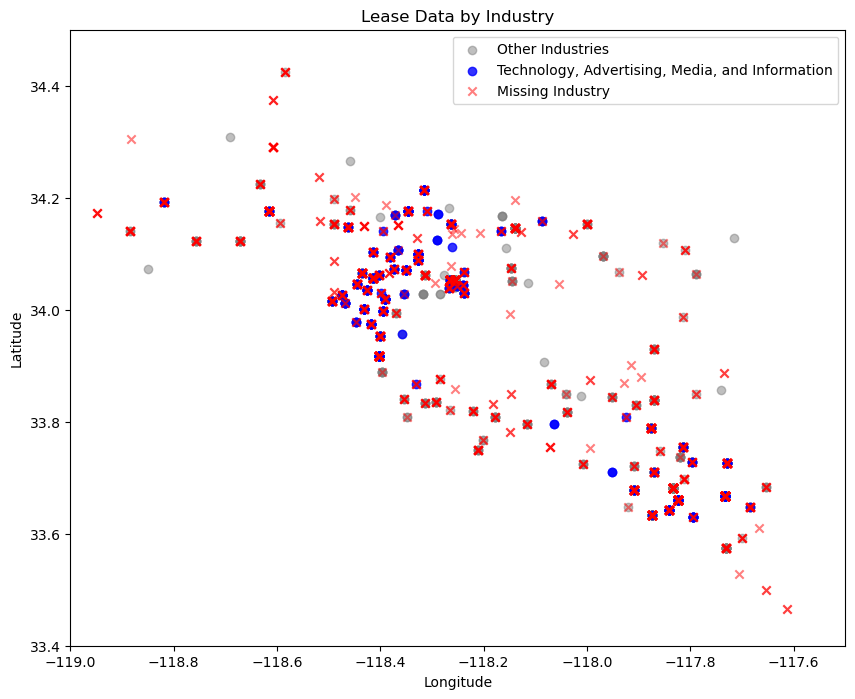

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the industry to highlight
highlight_industry = "Technology, Advertising, Media, and Information"  # Replace with the actual industry name

# Create a new column to classify data as 'highlight', 'other', or 'missing'
focused_lease['highlight'] = focused_lease['internal_industry'].apply(
    lambda x: 'Highlight' if x == highlight_industry else ('Missing' if pd.isna(x) else 'Other')
)

# Create the scatter plot
plt.figure(figsize=(10, 8))

# Plot for other industries
scatter_plot_other = plt.scatter(
    focused_lease.loc[focused_lease['highlight'] == 'Other', 'lng'], 
    focused_lease.loc[focused_lease['highlight'] == 'Other', 'lat'],
    c='gray', alpha=0.5, label='Other Industries'
)

# Plot for the highlighted industry
scatter_plot_highlight = plt.scatter(
    focused_lease.loc[focused_lease['highlight'] == 'Highlight', 'lng'], 
    focused_lease.loc[focused_lease['highlight'] == 'Highlight', 'lat'],
    c='blue', alpha=0.8, label=highlight_industry  # Change color as needed
)

# Plot for missing industries (NaN values)
scatter_plot_missing = plt.scatter(
    focused_lease.loc[focused_lease['highlight'] == 'Missing', 'lng'],
    focused_lease.loc[focused_lease['highlight'] == 'Missing', 'lat'],
    c='red', alpha=0.5, label='Missing Industry', marker='x'  # Red color and 'x' marker for missing industries
)

# Add labels and legend
plt.title('Lease Data by Industry')
plt.xlim(-119, -117.5)
plt.ylim(33.4, 34.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

# Display the plot
plt.show()
